In [1]:
import gym

import torch
import torch.autograd as autograd 

from dqn_utils import epsilon_greedy, plot, seed_everything
from gamma_RL.training import gamma_train, gamma_train_epsilonseed

import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

print("Print CUDA:  ", USE_CUDA)
print("Device   :", device)
if USE_CUDA:
  print("Device name  ", torch.cuda.get_device_name(0))

Print CUDA:   False
Device   : cpu


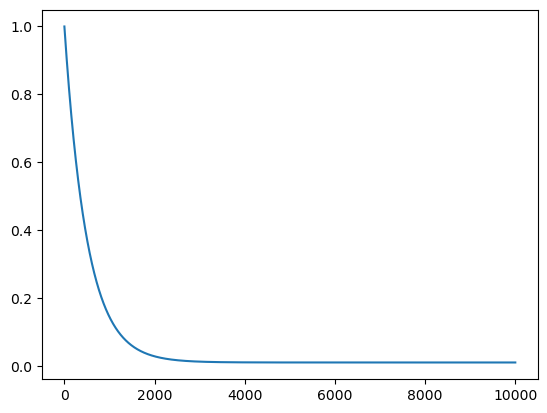

In [3]:
epsilon_greedy().plot()

In [4]:
env_id = "CartPole-v0"
env = gym.make(env_id)

In [5]:
#Run cell if using Tensorboard
from torch.utils.tensorboard import SummaryWriter
dir = 'tests/gamma_train/'
writer = SummaryWriter(log_dir=dir)

In [6]:
# seed = 10

# seed_everything(seed)


# for i in range(5):
#     seed_everything(seed)
#     gamma_train_instantiate = gamma_train(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device,
#                                             seed_number = seed)
#     gamma_train_instantiate.training_loop(num_frames=20000, batch_size=32, run_number=i, wandb_plot=True)

In [5]:
seed=10
seed_everything(seed, env=env)
env.seed(seed)
env.action_space.seed(seed)

[10]

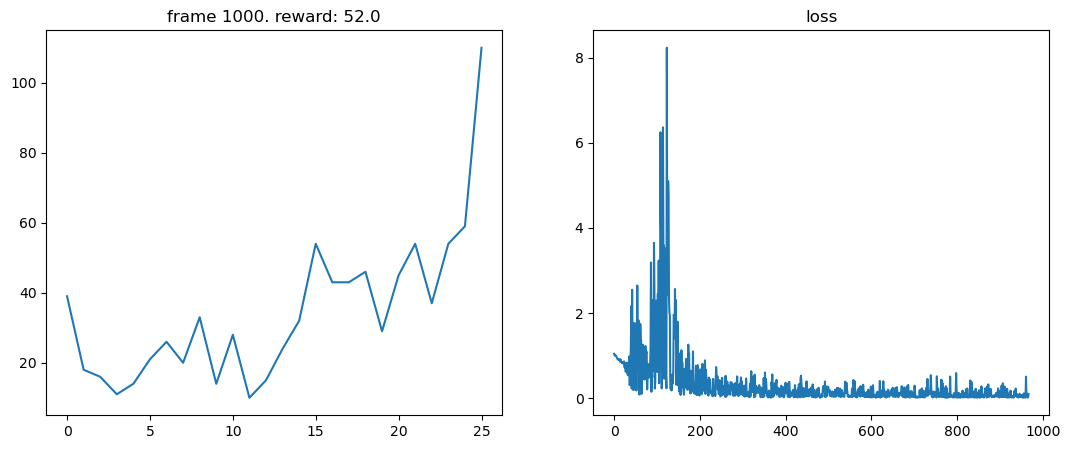

Epsilon Seed/Episode Losses,▂▂▃▂▂█▃▃▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epsilon Seed/Epsilon Threshold,▆▆█▄█▆▄▆▃▂▅▇▂▃▇▅▂▄█▁▅▅▂▄▆█▄▅▅▄▁▂▅▃▇▆▃▅▄▃
Epsilon Seed/Gamma,▇▇█▇██▅▃▁▁▂▂▂▂▂▂▂▃▂▁▁▂▂▂▂▂
Epsilon Seed/Random Action,█▁▁██▁▁▁█▁█▁█▁▁██▁▁▁███▁█▁▁▁▁█▁▁██▁▁███▁
Epsilon Seed/Rewards,▃▂▁▁▁▂▂▂▃▁▂▁▁▂▃▄▃▃▄▂▃▄▃▄▄█
Epsilon Seed/Episode Losses,0.09532
Epsilon Seed/Epsilon Threshold,0.32459
Epsilon Seed/Gamma,0.77425
Epsilon Seed/Random Action,0
Epsilon Seed/Rewards,110.0


In [6]:
# seed = 10
frame_duration = 1000


gamma_train_instantiate = gamma_train_epsilonseed(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device,
                                        seed_number = seed)
gamma_train_instantiate.training_loop(num_frames=frame_duration, batch_size=32, run_number=1, wandb_plot=True)